<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# The Central Limit Theorem

Suppose we have n independent distributions of random variables of <b> any kind. </b> These variables can be normally distributed, uniformly distributed, or any ditribution we like. Lets label these ditributions as follows:

$$\{x_1(k), x_2(k), ... x_n(k)\}$$

with $E[x_i(k)]=\mu_i$ and $E[(x_i(k)-\mu_i)^2]=\sigma_i^2$.

These distributions consist of measurements (they <b> are not </b> probability density functions). They can be thought of as vectors with finite many measurements. Note that the more measurements we make, the more we approach the actually probability distribution.

## The 'Mean Measurement' Distribution

Thinking of the distributions of vectors, we can some over them and create a new distribution as such:

$$x=\frac{1}{N} \sum_{i=1}^N x_i(k)$$

This new distribution takes the mean value for vector entry. Consider the example below where $x_1=[9,8,12]$, and $x_2=[10,11,8]$ and $x_3=[12,7,9]$.

In [3]:
x_1 = np.array([9,8,12])
x_2 = np.array([10,11,8])
x_3 = np.array([12,7,9])

x = (1./3)*(x_1+x_2+x_3)
x

array([ 10.33333333,   8.66666667,   9.66666667])

The new entries are the element-wise mean of the three data sets.

## The Prediction of the Central Limit Theorem

The central limit theorem predicts that the distribution $x$ , for large $N$, approaches a normal distribution.

# Programming Examples

## Application of Central Limit Theorem on Uniform Distributions

Below we make 100000 measurements of a uniformly distributed variable for each data set $x_i(k)$. In total we measure 30 data sets.

In [8]:
num_measurements = 100000
num_datasets = 30

data_sets = [r'$x_{%s}$' % i for i in np.arange(num_datasets)] #list of the names of the data sets
df = pd.DataFrame(columns = data_sets)

for i in np.arange(num_datasets):
    df[r'$x_{%s}$' % i] = np.random.rand(num_measurements)
    
df.head()

,$x_{0}$,$x_{1}$,$x_{2}$,$x_{3}$,$x_{4}$,$x_{5}$,$x_{6}$,$x_{7}$,$x_{8}$,$x_{9}$,...,$x_{20}$,$x_{21}$,$x_{22}$,$x_{23}$,$x_{24}$,$x_{25}$,$x_{26}$,$x_{27}$,$x_{28}$,$x_{29}$
0,0.857073,0.341350,0.846027,0.469317,0.653544,0.473007,0.073707,0.779952,0.112638,0.178213,...,0.423896,0.589153,0.330146,0.107317,0.167065,0.686347,0.647436,0.577177,0.996365,0.388639
1,0.404198,0.199993,0.277158,0.473927,0.420698,0.766797,0.680765,0.393622,0.453770,0.752557,...,0.514121,0.394929,0.729039,0.970609,0.293154,0.612170,0.633805,0.011639,0.673188,0.639218
2,0.421258,0.459594,0.666147,0.638385,0.917152,0.673767,0.859497,0.149235,0.697655,0.883902,...,0.245294,0.368556,0.377703,0.654895,0.941592,0.467642,0.232029,0.557334,0.014314,0.976385
3,0.172604,0.627612,0.695503,0.289789,0.325621,0.023695,0.355190,0.376219,0.873482,0.818927,...,0.276136,0.667383,0.249310,0.895456,0.664511,0.995837,0.888238,0.455745,0.276707,0.279636
4,0.994984,0.369710,0.501975,0.856254,0.693610,0.425664,0.235933,0.254447,0.223961,0.902343,...,0.961935,0.923911,0.202330,0.177988,0.438958,0.785460,0.828750,0.060360,0.526891,0.288687


In total there are 100000 measurements for each column. The measurements are uniformly distributed between 0 and 1. We provide evidence of this on the plot below.

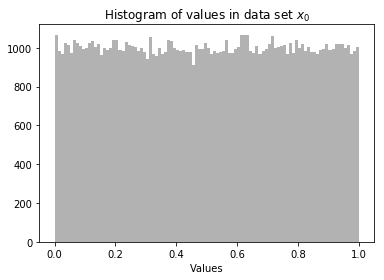

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(np.array(df['$x_{0}$']), bins=100, color='k', alpha=0.3)
ax.set_title('Histogram of values in data set $x_0$')
ax.set_xlabel('Values')

fig

The central limit theorem claims that if we average each row, thus producing a new data set $x$ (which could be represented by a new column in this dataframe), the new data set will be normally distributed.

In [9]:
df['$x$'] = df.mean(axis=1)
df[['$x$']].head()

,$x$
0,0.489629
1,0.501820
2,0.569685
3,0.493608
4,0.519153


Lets plot this data set as a histogram.

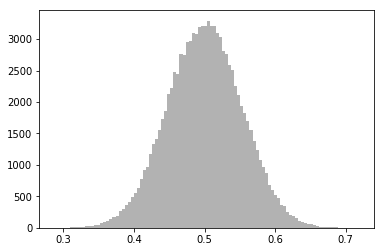

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(np.array(df['$x$']), bins=100, color='k', alpha=0.3)
ax.set_title('Histogram of values in data set $x_0$')
ax.set_xlabel('Values')

fig

As the central limit theorem suggests, this data is normally distributed.